# Dual Elemental Train Test

> Autor: Jordi Gomara Cruz

Aquest notebook té la finalitat de la predicció de valors de moveCode a partir del model entrenat pel dataset d'entrenament.

## 1 - ANÀLISI EXPLORATÒRIA DE DADES

### 1.1 - Visió general

1 - X: Posició de les X de Thomas

2 - Y: Posició de les Y de Thomas

3 - Attack1: Atac 1 de Thomas

4 - Attack2: Atac 2 de Thomas

5 - Kick: Atac de cama de Thomas

6 - DualAttack: Atac doble de punys de Thomas

7 - Ability: Habilitat de Thomas (Onada fosca)

8 - Protect: Habilitat de protecció de Thomas

9 - Jump: Thomas saltant

10 - Damage: Thomas ha rebut dolor

11 - EnemyX: Posició de les X de l'enemic

12 - EnemyY: Posició de les Y de l'enemic

13 - EnemyDamage: Enemic ha rebut dolor

14 - moveCode: moviment que farà l'enemic

## 2.- Model d'aprenentatge

### 2.1. - Datasets

In [ ]:
from google.colab import files

uploaded_train = files.upload()

Saving train2024-04-27_07-55-41.csv to train2024-04-27_07-55-41.csv


In [ ]:
from google.colab import files

uploaded_validate= files.upload()

Saving validate2024-04-27_12-49-07.csv to validate2024-04-27_12-49-07.csv


In [ ]:
import io
import pandas as pd

df_train = pd.read_csv(io.BytesIO(list(uploaded_train.values())[0]), sep=';')
df_train

,X,Y,Attack1,Attack2,Kick,DualAttack,Ability,Protect,Jump,Damage,EnemyX,EnemyY,EnemyDamage,moveCode
0,"-1,454","-3,945924",0,0,0,0,0,0,0,0.0,"-0,1397711","-3,957906",0.0,Shoot
1,"-1,454","-3,945924",0,0,0,0,0,0,0,0.0,"-0,1440845","-3,95761",0.0,Shoot
2,"-1,454","-3,945924",0,0,0,0,0,0,0,0.0,"-0,1462411","-3,956521",0.0,Shoot
3,"-1,454","-3,945924",0,0,0,0,0,0,0,0.0,"-0,1483978","-3,957514",0.0,Shoot
4,"-1,454","-3,945924",0,0,0,0,0,0,0,0.0,"-0,1621139","-3,94789",0.0,Shoot
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29555,"-1,79173","-3,950057",0,0,0,0,0,0,0,0.0,NaN,NaN,NaN,NaN
29556,"-1,79173","-3,950057",0,0,0,0,0,0,0,0.0,NaN,NaN,NaN,NaN
29557,"-1,79173","-3,950057",0,0,0,0,0,0,0,0.0,NaN,NaN,NaN,NaN
29558,"-1,79173","-3,950057",0,0,0,0,0,0,0,0.0,NaN,NaN,NaN,NaN


In [ ]:
df_validate = pd.read_csv(io.BytesIO(list(uploaded_validate.values())[0]), sep=';')
df_validate

,X,Y,Attack1,Attack2,Kick,DualAttack,Ability,Protect,Jump,Damage,EnemyX,EnemyY,EnemyDamage,moveCode
0,"-1,880457","-3,945924",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"-0,5124402","-3,945982",0.0,Shoot
1,"-1,880457","-3,945924",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"-0,5288246","-3,948381",0.0,Shoot
2,"-1,880457","-3,945924",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"-0,5452091","-3,946856",0.0,Shoot
3,"-1,880457","-3,945924",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"-0,5452091","-3,946856",0.0,Shoot
4,"-1,880457","-3,945924",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"-0,5452091","-3,946856",0.0,Shoot
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26317,"-1,913771","-3,950018",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
26318,"-1,913771","-3,950018",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
26319,"-1,913771","-3,950018",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
26320,"-1,913771","-3,950018",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


### 2.2. - Tractament de dades

Primerament, elimino els nulls que hi hagi perquè, quan creo els datasets, els deixo una estona més després de derrotar la IA perquè no perdin informació per deixar de llegir massa ràpid. El tractament de dades, tant del dataset d'entrenament com el de validació, és similar a les dades inicials, però ara no cal protegir moveCode dels nulls perquè, tal com s'havia explicat anteriorment, si el jugador no fa cap moviment, el Secret Boss dispararà o atacarà amb el puny depenent de la distància. En altres paraules, exceptuant si la IA ha perdut la partida, sempre farà un moviment.

#### 2.2.1. - Eliminació de nulls

In [ ]:
print(df_train.isnull().sum())

X                 0
Y                 0
Attack1           0
Attack2           0
Kick              0
DualAttack        0
Ability           0
Protect           0
Jump              0
Damage            1
EnemyX         5195
EnemyY         5195
EnemyDamage    5195
moveCode       5219
dtype: int64


In [ ]:
print(df_validate.isnull().sum())

X                 0
Y                 1
Attack1           1
Attack2           1
Kick              1
DualAttack        1
Ability           1
Protect           1
Jump              1
Damage            1
EnemyX         4040
EnemyY         4040
EnemyDamage    4040
moveCode       4072
dtype: int64


In [ ]:
df_train_without_nulls = df_train.dropna()
print(df_train_without_nulls.isnull().sum())
df_train_without_nulls

X              0
Y              0
Attack1        0
Attack2        0
Kick           0
DualAttack     0
Ability        0
Protect        0
Jump           0
Damage         0
EnemyX         0
EnemyY         0
EnemyDamage    0
moveCode       0
dtype: int64


,X,Y,Attack1,Attack2,Kick,DualAttack,Ability,Protect,Jump,Damage,EnemyX,EnemyY,EnemyDamage,moveCode
0,"-1,454","-3,945924",0,0,0,0,0,0,0,0.0,"-0,1397711","-3,957906",0.0,Shoot
1,"-1,454","-3,945924",0,0,0,0,0,0,0,0.0,"-0,1440845","-3,95761",0.0,Shoot
2,"-1,454","-3,945924",0,0,0,0,0,0,0,0.0,"-0,1462411","-3,956521",0.0,Shoot
3,"-1,454","-3,945924",0,0,0,0,0,0,0,0.0,"-0,1483978","-3,957514",0.0,Shoot
4,"-1,454","-3,945924",0,0,0,0,0,0,0,0.0,"-0,1621139","-3,94789",0.0,Shoot
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24360,"-2,273902","-3,824946",0,1,0,0,0,0,0,0.0,"-2,668611","-3,645846",0.0,Protect
24361,"-2,333902","-3,935702",0,0,0,0,0,0,0,0.0,"-2,714517","-3,768132",0.0,Protect
24362,"-2,367827","-3,974056",1,0,0,0,0,0,0,0.0,"-2,758732","-3,888094",0.0,Punch
24363,"-2,423119","-3,957895",0,1,0,0,0,0,0,0.0,"-2,775812","-3,950527",0.0,Shoot


In [ ]:
df_validate_without_nulls = df_validate.dropna()
print(df_validate_without_nulls.isnull().sum())
df_validate_without_nulls

X              0
Y              0
Attack1        0
Attack2        0
Kick           0
DualAttack     0
Ability        0
Protect        0
Jump           0
Damage         0
EnemyX         0
EnemyY         0
EnemyDamage    0
moveCode       0
dtype: int64


,X,Y,Attack1,Attack2,Kick,DualAttack,Ability,Protect,Jump,Damage,EnemyX,EnemyY,EnemyDamage,moveCode
0,"-1,880457","-3,945924",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"-0,5124402","-3,945982",0.0,Shoot
1,"-1,880457","-3,945924",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"-0,5288246","-3,948381",0.0,Shoot
2,"-1,880457","-3,945924",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"-0,5452091","-3,946856",0.0,Shoot
3,"-1,880457","-3,945924",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"-0,5452091","-3,946856",0.0,Shoot
4,"-1,880457","-3,945924",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"-0,5452091","-3,946856",0.0,Shoot
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22277,"-0,02848076","-3,949747",0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,"-1,790997","-3,746053",0.0,Jump
22278,"-0,02848076","-3,949747",0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,"-1,770997","-3,822874",0.0,Jump
22279,"-0,02848076","-3,949747",0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,"-1,769814","-3,895304",0.0,Jump
22280,"-0,02848076","-3,949747",0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,"-1,76863","-3,971658",0.0,Jump


#### 2.2.2.- Transformacions dels valors i eliminar repetits

La transformació del tipus dels camps i l'eliminació de valors repetits és exactament igual que la de les dades inicials.

In [ ]:
df_model_train = df_train_without_nulls.copy()[(df_train_without_nulls != df_train_without_nulls.shift()).any(axis=1)]
df_model_train['X'] = df_model_train['X'].str.replace(',', '.').astype(float)
df_model_train['Y'] = df_model_train['Y'].str.replace(',', '.').astype(float)
df_model_train['EnemyX'] = df_model_train['EnemyX'].str.replace(',', '.').astype(float)
df_model_train['EnemyY'] = df_model_train['EnemyY'].str.replace(',', '.').astype(float)
df_model_train['Attack1'] = df_model_train['Attack1'].astype(int)
df_model_train['Attack2'] = df_model_train['Attack2'].astype(int)
df_model_train['Kick'] = df_model_train['Kick'].astype(int)
df_model_train['DualAttack'] = df_model_train['DualAttack'].astype(int)
df_model_train['Ability'] = df_model_train['Ability'].astype(int)
df_model_train['Protect'] = df_model_train['Protect'].astype(int)
df_model_train['Jump'] = df_model_train['Jump'].astype(int)
df_model_train['Damage'] = df_model_train['Damage'].astype(int)
df_model_train['EnemyDamage'] = df_model_train['EnemyDamage'].astype(int)
df_model_train

,X,Y,Attack1,Attack2,Kick,DualAttack,Ability,Protect,Jump,Damage,EnemyX,EnemyY,EnemyDamage,moveCode
0,-1.454000,-3.945924,0,0,0,0,0,0,0,0,-0.139771,-3.957906,0,Shoot
1,-1.454000,-3.945924,0,0,0,0,0,0,0,0,-0.144085,-3.957610,0,Shoot
2,-1.454000,-3.945924,0,0,0,0,0,0,0,0,-0.146241,-3.956521,0,Shoot
3,-1.454000,-3.945924,0,0,0,0,0,0,0,0,-0.148398,-3.957514,0,Shoot
4,-1.454000,-3.945924,0,0,0,0,0,0,0,0,-0.162114,-3.947890,0,Shoot
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24360,-2.273902,-3.824946,0,1,0,0,0,0,0,0,-2.668611,-3.645846,0,Protect
24361,-2.333902,-3.935702,0,0,0,0,0,0,0,0,-2.714517,-3.768132,0,Protect
24362,-2.367827,-3.974056,1,0,0,0,0,0,0,0,-2.758732,-3.888094,0,Punch
24363,-2.423119,-3.957895,0,1,0,0,0,0,0,0,-2.775812,-3.950527,0,Shoot


In [ ]:
print("Anàlisi de moveCode")
train_moveCode = df_model_train.groupby(by="moveCode").agg({
  'moveCode': 'count'
})
train_moveCode

Anàlisi de moveCode


,moveCode
moveCode,
Jump,2473
Left,175
Protect,775
Punch,2054
Right,148
Shoot,7412


<Axes: >

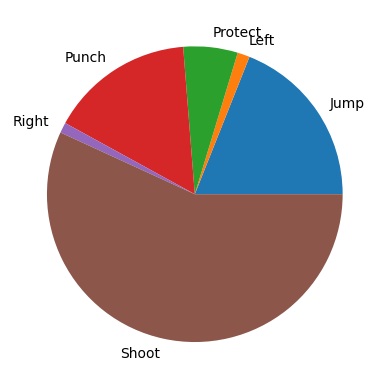

In [ ]:
df_model_train.groupby('moveCode').size().plot(kind='pie')

Ara sempre hauran valors en la majoria de casos (ja que ara la IA ataca si o si).

In [ ]:
df_model_validate = df_validate_without_nulls.copy()[(df_validate_without_nulls != df_validate_without_nulls.shift()).any(axis=1)]
df_model_validate['X'] = df_model_validate['X'].str.replace(',', '.').astype(float)
df_model_validate['Y'] = df_model_validate['Y'].str.replace(',', '.').astype(float)
df_model_validate['EnemyX'] = df_model_validate['EnemyX'].str.replace(',', '.').astype(float)
df_model_validate['EnemyY'] = df_model_validate['EnemyY'].str.replace(',', '.').astype(float)
df_model_validate['Attack1'] = df_model_validate['Attack1'].astype(int)
df_model_validate['Attack2'] = df_model_validate['Attack2'].astype(int)
df_model_validate['Kick'] = df_model_validate['Kick'].astype(int)
df_model_validate['DualAttack'] = df_model_validate['DualAttack'].astype(int)
df_model_validate['Ability'] = df_model_validate['Ability'].astype(int)
df_model_validate['Protect'] = df_model_validate['Protect'].astype(int)
df_model_validate['Jump'] = df_model_validate['Jump'].astype(int)
df_model_validate['Damage'] = df_model_validate['Damage'].astype(int)
df_model_validate['EnemyDamage'] = df_model_validate['EnemyDamage'].astype(int)
df_model_validate = df_model_validate.drop('moveCode', axis=1)
df_model_validate

,X,Y,Attack1,Attack2,Kick,DualAttack,Ability,Protect,Jump,Damage,EnemyX,EnemyY,EnemyDamage
0,-1.880457,-3.945924,0,0,0,0,0,0,0,0,-0.512440,-3.945982,0
1,-1.880457,-3.945924,0,0,0,0,0,0,0,0,-0.528825,-3.948381,0
2,-1.880457,-3.945924,0,0,0,0,0,0,0,0,-0.545209,-3.946856,0
7,-1.880457,-3.945924,0,0,0,0,0,0,0,0,-0.548474,-3.945747,0
9,-1.880457,-3.945924,0,0,0,0,0,0,0,0,-0.551739,-3.948562,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22275,-0.028481,-3.949747,0,0,0,0,1,0,0,0,-1.790997,-3.746053,0
22278,-0.028481,-3.949747,0,0,0,0,1,0,0,0,-1.770997,-3.822874,0
22279,-0.028481,-3.949747,0,0,0,0,1,0,0,0,-1.769814,-3.895304,0
22280,-0.028481,-3.949747,0,0,0,0,1,0,0,0,-1.768630,-3.971658,0


In [ ]:
df_model_train.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Index: 13037 entries, 0 to 24364
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   X            13037 non-null  float64
 1   Y            13037 non-null  float64
 2   Attack1      13037 non-null  int64  
 3   Attack2      13037 non-null  int64  
 4   Kick         13037 non-null  int64  
 5   DualAttack   13037 non-null  int64  
 6   Ability      13037 non-null  int64  
 7   Protect      13037 non-null  int64  
 8   Jump         13037 non-null  int64  
 9   Damage       13037 non-null  int64  
 10  EnemyX       13037 non-null  float64
 11  EnemyY       13037 non-null  float64
 12  EnemyDamage  13037 non-null  int64  
 13  moveCode     13037 non-null  object 
dtypes: float64(4), int64(9), object(1)
memory usage: 1.5+ MB


### 2.3. - Feature engineering

S'ha transformat el camp moveCode en categòric i després numèric per analitzar totes les correlacions. Com es pot veure, hi ha camps amb molt bona relació com X amb EnemyX (la posició d'en Thomas i del Secret Boss tenen molta relació perquè la IA persegueix al jugador) i Y amb Jump (quan salta en Thomas, les Y augmenten). També hi ha camps amb zero o relació negativa que indiquen que podria empitjorar la manera de predir moveCode. En aquest cas, serien les dades del camp Y, EnemyY i Jump perquè són camps que no necessàriament activen el mateix moviment del Secret Boss perquè tenen altres factors, però he optat en no eliminar-los per ser vitals pel videojoc.


#### 2.3.1. - Mapa de calor

In [ ]:
df_train_cat = df_model_train.copy()
df_train_cat['moveCode'] = df_train_cat['moveCode'].astype('category')
df_train_cat['moveCode_cat'] = df_train_cat['moveCode'].cat.codes
df_train_cat = df_train_cat.drop('moveCode', axis=1)
df_train_cat

,X,Y,Attack1,Attack2,Kick,DualAttack,Ability,Protect,Jump,Damage,EnemyX,EnemyY,EnemyDamage,moveCode_cat
0,-1.454000,-3.945924,0,0,0,0,0,0,0,0,-0.139771,-3.957906,0,5
1,-1.454000,-3.945924,0,0,0,0,0,0,0,0,-0.144085,-3.957610,0,5
2,-1.454000,-3.945924,0,0,0,0,0,0,0,0,-0.146241,-3.956521,0,5
3,-1.454000,-3.945924,0,0,0,0,0,0,0,0,-0.148398,-3.957514,0,5
4,-1.454000,-3.945924,0,0,0,0,0,0,0,0,-0.162114,-3.947890,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24360,-2.273902,-3.824946,0,1,0,0,0,0,0,0,-2.668611,-3.645846,0,2
24361,-2.333902,-3.935702,0,0,0,0,0,0,0,0,-2.714517,-3.768132,0,2
24362,-2.367827,-3.974056,1,0,0,0,0,0,0,0,-2.758732,-3.888094,0,3
24363,-2.423119,-3.957895,0,1,0,0,0,0,0,0,-2.775812,-3.950527,0,5


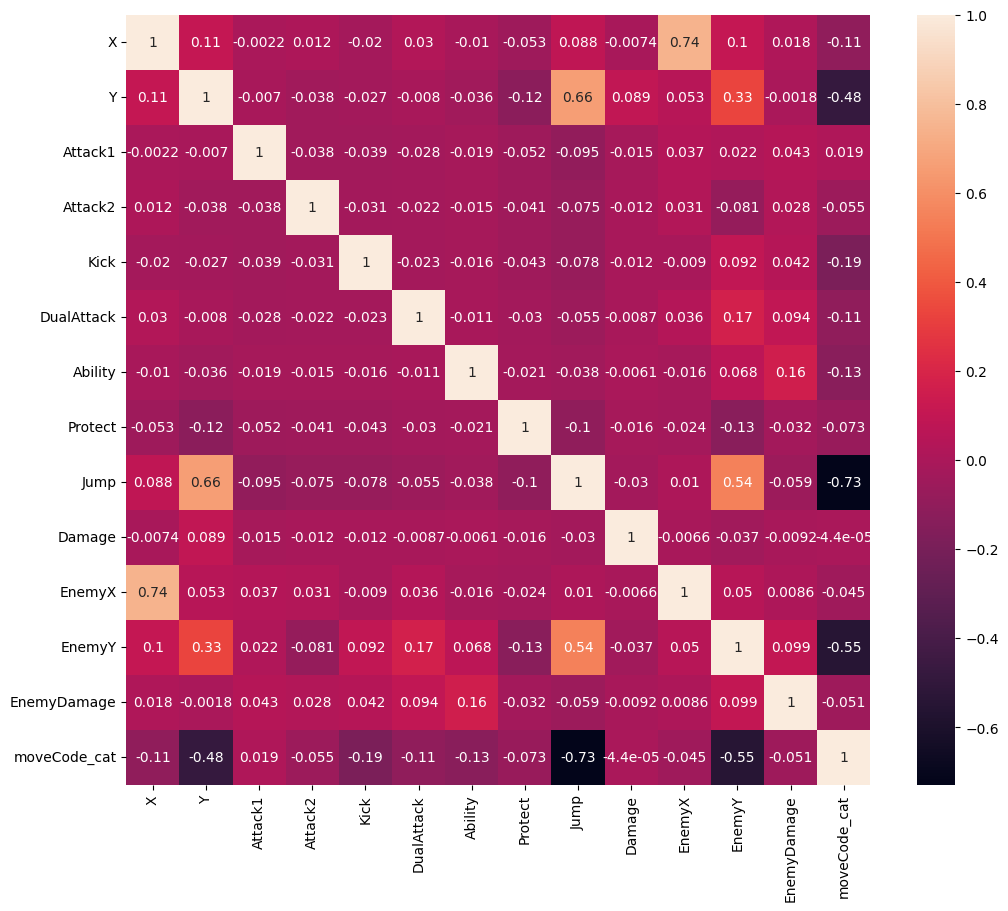

In [ ]:
import seaborn as sns
from matplotlib import pyplot as plt
plt.figure(figsize=(12,10))
cor = df_train_cat.corr()
sns.heatmap(cor, annot=True)
plt.show()

Si observem com són d'importants els punts de coordenades d'en Thomas
i del Secret Boss, es podria crear un camp que mesura la distància com ho fa Unity. En altres paraules, ara existirà el camp de distància, amb el càlcul de la distància euclidiana i podem veure la correlació amb els altres camps.

#### 2.3.2. Posicions X Y

In [ ]:
import math
def get_distance(row):
  return math.sqrt(pow(row["X"] - row["EnemyX"], 2) + pow(row["Y"] - row["EnemyY"], 2))

In [ ]:
df_train_changes = df_train_cat.copy()
df_train_changes['Distance'] = df_train_changes.apply(get_distance, axis=1)
df_train_cat

,X,Y,Attack1,Attack2,Kick,DualAttack,Ability,Protect,Jump,Damage,EnemyX,EnemyY,EnemyDamage,moveCode_cat
0,-1.454000,-3.945924,0,0,0,0,0,0,0,0,-0.139771,-3.957906,0,5
1,-1.454000,-3.945924,0,0,0,0,0,0,0,0,-0.144085,-3.957610,0,5
2,-1.454000,-3.945924,0,0,0,0,0,0,0,0,-0.146241,-3.956521,0,5
3,-1.454000,-3.945924,0,0,0,0,0,0,0,0,-0.148398,-3.957514,0,5
4,-1.454000,-3.945924,0,0,0,0,0,0,0,0,-0.162114,-3.947890,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24360,-2.273902,-3.824946,0,1,0,0,0,0,0,0,-2.668611,-3.645846,0,2
24361,-2.333902,-3.935702,0,0,0,0,0,0,0,0,-2.714517,-3.768132,0,2
24362,-2.367827,-3.974056,1,0,0,0,0,0,0,0,-2.758732,-3.888094,0,3
24363,-2.423119,-3.957895,0,1,0,0,0,0,0,0,-2.775812,-3.950527,0,5


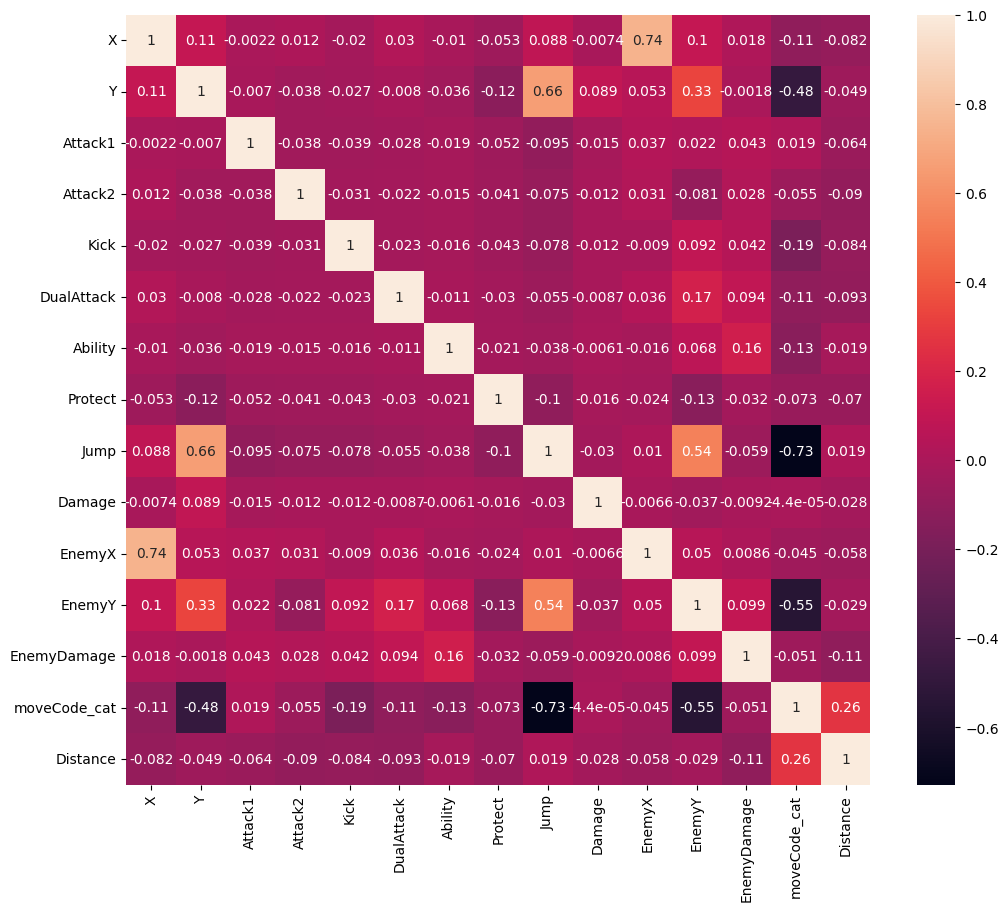

In [ ]:
import seaborn as sns
from matplotlib import pyplot as plt
plt.figure(figsize=(12,10))
cor = df_train_changes.corr()
sns.heatmap(cor, annot=True)
plt.show()

Gràcies a afegir Distance, podem veure un camp que té bona relació amb moveCode i que serà vital per a la predicció dels resultats.

In [ ]:
df_model_train['Distance'] = df_model_train.apply(get_distance, axis=1)

In [ ]:
df_model_validate['Distance'] = df_model_validate.apply(get_distance, axis=1)

#### 2.3.4. - CSV a JSON

In [ ]:
file_name_train = next(iter(uploaded_train))
file_name_train

'train2024-04-27_07-55-41.csv'

In [ ]:
df_model_train.to_json(file_name_train.split("csv")[0] + "json", orient='records')

### 2.4. - Arbres de decisió: GradientBoostingClassifier

GradientBoostingClassifier: model d'aprenentatge automàtic basat en arbres de decisió formant part de la família d'assembladors. Aquest classificador es basa en Gradient boosting, que analitza la regressió i prediu els resultats utilitzant un conjunt de models de predicció febles.

En aquest model vaig utilitzar dos avaluadors per a comparar-los.
El primer és cross_val_score, que fa servir una avaluació creauada. El segon utilitzat ha estat GridSearchCV, que fa una cerca exhaustiva
per a trobar els millors hiperparàmetres per a obtenir la millor predicció.

#### 2.4.1. - Partició de train test

Per a la partició de train test, es va utilitzar la funció train_test_split per a poder separar-los amb 25 % de dades de test i 75 % de dades d'entrenament i, abans d'això, es van separar els camps de la classe a predir. Per la part de processament de
dades no es va fer servir cap preprocessador numèric com MinMaxScaler perquè empitjorava els resultats amb un 1-2 % més d'error.

In [ ]:
X_class = df_model_train.copy()
X_class = X_class.drop("moveCode", axis=1)
X_class

,X,Y,Attack1,Attack2,Kick,DualAttack,Ability,Protect,Jump,Damage,EnemyX,EnemyY,EnemyDamage,Distance
0,-1.454000,-3.945924,0,0,0,0,0,0,0,0,-0.139771,-3.957906,0,1.314284
1,-1.454000,-3.945924,0,0,0,0,0,0,0,0,-0.144085,-3.957610,0,1.309968
2,-1.454000,-3.945924,0,0,0,0,0,0,0,0,-0.146241,-3.956521,0,1.307802
3,-1.454000,-3.945924,0,0,0,0,0,0,0,0,-0.148398,-3.957514,0,1.305654
4,-1.454000,-3.945924,0,0,0,0,0,0,0,0,-0.162114,-3.947890,0,1.291888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24360,-2.273902,-3.824946,0,1,0,0,0,0,0,0,-2.668611,-3.645846,0,0.433442
24361,-2.333902,-3.935702,0,0,0,0,0,0,0,0,-2.714517,-3.768132,0,0.415870
24362,-2.367827,-3.974056,1,0,0,0,0,0,0,0,-2.758732,-3.888094,0,0.400245
24363,-2.423119,-3.957895,0,1,0,0,0,0,0,0,-2.775812,-3.950527,0,0.352770


In [ ]:
y_class=df_model_train['moveCode'].copy()
y_class

0          Shoot
1          Shoot
2          Shoot
3          Shoot
4          Shoot
          ...   
24360    Protect
24361    Protect
24362      Punch
24363      Shoot
24364    Protect
Name: moveCode, Length: 13037, dtype: object

In [ ]:
from sklearn.model_selection import train_test_split

X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_class, y_class, test_size=.25)

In [ ]:
print(len(X_train_class), len(X_test_class))

9777 3260


In [ ]:
X_train_class

,X,Y,Attack1,Attack2,Kick,DualAttack,Ability,Protect,Jump,Damage,EnemyX,EnemyY,EnemyDamage,Distance
14183,1.123830,-3.950012,0,0,0,0,0,0,0,0,-0.992959,-3.951083,0,2.116789
16475,3.262234,-3.950013,0,0,0,0,0,0,0,0,3.431238,-3.954647,0,0.169068
16029,3.321285,-3.451271,0,0,0,0,0,0,0,0,2.910537,-3.947350,0,0.644056
19475,-3.078640,-3.737587,0,0,0,0,0,0,0,0,-2.924513,-3.956667,0,0.267864
2570,-0.336466,-3.950547,0,0,0,0,0,0,0,0,-3.345866,-3.883619,0,3.010145
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22827,-0.909242,-3.950012,0,0,0,0,0,0,0,0,-0.712470,-3.945871,0,0.196815
5904,0.051897,-3.950014,0,0,0,0,0,0,0,0,-2.458448,-3.954045,0,2.510348
20574,-4.984772,-3.950022,0,1,0,0,0,0,0,0,-1.566157,-3.961925,0,3.418636
4064,3.989218,-3.140449,0,0,0,0,0,0,0,0,3.865412,-3.222045,0,0.148276


In [ ]:
X_test_class

,X,Y,Attack1,Attack2,Kick,DualAttack,Ability,Protect,Jump,Damage,EnemyX,EnemyY,EnemyDamage,Distance
17606,-2.138765,-3.950019,0,0,0,0,0,0,0,0,-3.845467,-3.957786,0,1.706720
10176,2.117766,-3.950010,0,0,0,0,0,0,0,0,0.599126,-3.954437,0,1.518646
10904,3.495997,-3.950729,0,0,0,0,0,0,0,0,2.825894,-3.047694,0,1.124504
10830,1.678960,-3.950011,0,1,0,0,0,0,0,0,1.809825,-3.957517,0,0.131080
10930,4.064504,-3.365052,0,0,0,0,0,0,0,0,3.145766,-3.677221,0,0.970324
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10407,-1.079060,-3.950016,0,0,0,0,0,0,0,0,-0.599002,-3.515486,0,0.647512
19838,-1.059774,-3.608875,0,0,0,0,0,0,0,0,-0.249152,-3.948537,0,0.878907
11825,-5.202363,-3.950024,0,0,0,0,0,0,0,0,-2.864782,-3.956281,0,2.337589
18191,2.681900,-3.950009,0,0,0,0,0,0,0,0,1.553961,-3.953980,0,1.127946


#### 2.4.2. - Preprocessament train

Variables categòriques

Variables numèriques

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler()
# numerical=['X','Y','Attack1','Attack2','Kick','DualAttack','Ability','Protect','Jump','Damage','EnemyX','EnemyY','EnemyDamage']
# X_scaled_knn = pd.DataFrame(scaler.fit_transform(X_train_class[numerical].values),columns=numerical, index=X_train_class.index)
# X_scaled_knn.head()
X_scaled_class = X_train_class.copy()

#### 2.4.3. Preprocessament validate

Variables numèriques

In [ ]:
# scaler = MinMaxScaler()
# numerical=['X','Y','Attack1','Attack2','Kick','DualAttack','Ability','Protect','Jump','Damage','EnemyX','EnemyY','EnemyDamage']
# validate_pre = pd.DataFrame(scaler.fit_transform(df_model_validate[numerical].values),columns=numerical, index=df_model_validate.index)
# validate_pre.head()
validate_pre = df_model_validate.copy()

#### 2.4.4. - Classifier

##### 2.4.4.1 - cross_score

Es pot veure que la mitjana de predicció encertada és d'aproximadament el 95 % amb una desviació estàndard del 0,5 %.

In [ ]:
# https://scikit-learn.org/stable/modules/ensemble.html
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score

classifierGradient = GradientBoostingClassifier(n_estimators=100, random_state=0, learning_rate=0.2)
cv_results = cross_val_score(classifierGradient, X_scaled_class, y_train_class, cv=10)
print("Resultats: ", cv_results)
print("Mitjana: ", cv_results.mean())
print("Desviació estandard: ", cv_results.std())

Resultats:  [0.95092025 0.95194274 0.94376278 0.94274029 0.94274029 0.95807771
 0.93762781 0.94165814 0.95905834 0.95087001]
Mitjana:  0.9479398350193511
Desviació estandard:  0.0069080073920519056


##### 2.4.4.2. - GridSearch

In [ ]:
classifierGradient.get_params().keys()

dict_keys(['ccp_alpha', 'criterion', 'init', 'learning_rate', 'loss', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_iter_no_change', 'random_state', 'subsample', 'tol', 'validation_fraction', 'verbose', 'warm_start'])

In [ ]:
import numpy as np

param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.1, 0.05, 0.01],
    'max_depth': [3, 4, 5]
}

In [ ]:
# Amb GridSearch
from sklearn.model_selection import GridSearchCV

bestClassifierGradient = GridSearchCV(GradientBoostingClassifier(n_estimators=1, random_state=0, learning_rate=0.2), param_grid, cv=2)

#### 2.4.5. - Avaluació

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import precision_score
scoring_list = {'precision_multiclass': make_scorer(precision_score, average='weighted')}
cv_results = cross_validate(classifierGradient, X_scaled_class, y_train_class, cv=10, scoring=scoring_list)

In [ ]:
cv_results

{'fit_time': array([14.03815174, 13.13419175, 13.41781139, 32.02768922, 28.34372282,
        24.3536272 , 20.9534626 , 15.36086106, 13.11256886, 16.46613288]),
 'score_time': array([0.01716781, 0.0158329 , 0.01678991, 0.02744555, 0.02547455,
        0.04627633, 0.02701664, 0.02554297, 0.02584291, 0.02844715]),
 'test_precision_multiclass': array([0.95132975, 0.95191521, 0.9440523 , 0.94255167, 0.94279887,
        0.95930435, 0.94058244, 0.94069961, 0.95927459, 0.9501836 ])}

#### 2.4.6. Plotting Cross-validated

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_train_class_num = label_encoder.fit_transform(y_train_class)

print(y_train_class)
print(y_train_class_num)

21656      Shoot
2434        Jump
11136      Shoot
23972      Shoot
8125       Shoot
          ...   
11653       Jump
7944       Punch
15626      Shoot
10820    Protect
22842      Punch
Name: moveCode, Length: 9777, dtype: object
[5 0 5 ... 5 2 3]


In [ ]:
from sklearn.model_selection import cross_val_predict

y_pred_GradientBoosting = cross_val_predict(classifierGradient, X_scaled_class, y_train_class_num, cv=10)
y_pred_GradientBoosting

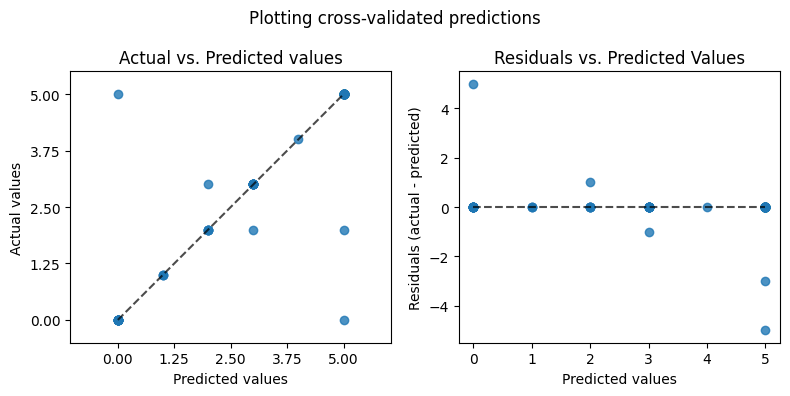

In [ ]:
import matplotlib.pyplot as plt

from sklearn.metrics import PredictionErrorDisplay

fig, axs = plt.subplots(ncols=2, figsize=(8, 4))
PredictionErrorDisplay.from_predictions(
    y_train_class_num,
    y_pred=y_pred_GradientBoosting,
    kind="actual_vs_predicted",
    subsample=100,
    ax=axs[0],
    random_state=0,
)
axs[0].set_title("Actual vs. Predicted values")
PredictionErrorDisplay.from_predictions(
    y_train_class_num,
    y_pred=y_pred_GradientBoosting,
    kind="residual_vs_predicted",
    subsample=100,
    ax=axs[1],
    random_state=0,
)
axs[1].set_title("Residuals vs. Predicted Values")
fig.suptitle("Plotting cross-validated predictions")
plt.tight_layout()
plt.show()

Entrenament

In [ ]:
classifierGradient.fit(X_scaled_class, y_train_class)

GradientBoostingClassifier(learning_rate=0.2, random_state=0)

In [ ]:
bestClassifierGradient.fit(X_scaled_class, y_train_class)

GridSearchCV(cv=2,
             estimator=GradientBoostingClassifier(learning_rate=0.2,
                                                  n_estimators=1,
                                                  random_state=0),
             param_grid={'learning_rate': [0.1, 0.05, 0.01],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [100, 200, 300]})

#### 2.4.7. - Testing

##### 2.4.7.1. - cross_score

In [ ]:
predictions_testing_gradient = classifierGradient.predict(X_test_class)

In [ ]:
predictions_testing_gradient

array(['Shoot', 'Shoot', 'Shoot', ..., 'Shoot', 'Shoot', 'Jump'],
      dtype=object)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

classification_report(y_test_class,predictions_testing_gradient)

'              precision    recall  f1-score   support\n\n        Jump       0.95      0.93      0.94       611\n        Left       0.87      0.72      0.79        46\n     Protect       0.89      0.86      0.87       187\n       Punch       0.91      0.94      0.92       536\n       Right       0.72      0.69      0.71        42\n       Shoot       0.97      0.97      0.97      1838\n\n    accuracy                           0.95      3260\n   macro avg       0.89      0.85      0.87      3260\nweighted avg       0.95      0.95      0.95      3260\n'

In [ ]:
confusion_matrix(y_test_class,predictions_testing_gradient)

array([[ 571,    0,    7,    8,    1,   24],
       [   1,   33,    0,    5,    0,    7],
       [   2,    1,  160,   12,    0,   12],
       [  10,    2,    4,  505,    3,   12],
       [   0,    0,    0,   10,   29,    3],
       [  17,    2,    8,   17,    7, 1787]])

##### 2.4.7.2. - GridSearch

In [ ]:
predictions_testing_gradient_grid = bestClassifierGradient.predict(X_test_class)
predictions_testing_gradient_grid

array(['Shoot', 'Shoot', 'Shoot', ..., 'Jump', 'Shoot', 'Shoot'],
      dtype=object)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

classification_report(y_test_class,predictions_testing_gradient_grid)

'              precision    recall  f1-score   support\n\n        Jump       0.97      0.92      0.95       665\n        Left       0.87      0.74      0.80        61\n     Protect       0.91      0.94      0.92       183\n       Punch       0.91      0.95      0.93       464\n       Right       0.83      0.75      0.79        32\n       Shoot       0.97      0.98      0.97      1855\n\n    accuracy                           0.95      3260\n   macro avg       0.91      0.88      0.89      3260\nweighted avg       0.95      0.95      0.95      3260\n'

In [ ]:
confusion_matrix(y_test_class,predictions_testing_gradient_grid)

array([[ 613,    0,    7,   10,    0,   35],
       [   1,   45,    0,    8,    0,    7],
       [   2,    0,  172,    6,    0,    3],
       [   4,    2,    3,  443,    2,   10],
       [   0,    0,    0,    5,   24,    3],
       [  12,    5,    7,   16,    3, 1812]])

#### 2.4.8. - Processament validador

In [ ]:
predictions = classifierGradient.predict(validate_pre)

In [ ]:
predictions

array(['Shoot', 'Shoot', 'Shoot', ..., 'Jump', 'Shoot', 'Jump'],
      dtype=object)

In [ ]:
results = pd.DataFrame(validate_pre)
results['moveCode'] = predictions
results = results.drop("Distance", axis=1)
results

,X,Y,Attack1,Attack2,Kick,DualAttack,Ability,Protect,Jump,Damage,EnemyX,EnemyY,EnemyDamage,moveCode
0,-1.880457,-3.945924,0,0,0,0,0,0,0,0,-0.512440,-3.945982,0,Shoot
1,-1.880457,-3.945924,0,0,0,0,0,0,0,0,-0.528825,-3.948381,0,Shoot
2,-1.880457,-3.945924,0,0,0,0,0,0,0,0,-0.545209,-3.946856,0,Shoot
7,-1.880457,-3.945924,0,0,0,0,0,0,0,0,-0.548474,-3.945747,0,Shoot
9,-1.880457,-3.945924,0,0,0,0,0,0,0,0,-0.551739,-3.948562,0,Shoot
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22275,-0.028481,-3.949747,0,0,0,0,1,0,0,0,-1.790997,-3.746053,0,Jump
22278,-0.028481,-3.949747,0,0,0,0,1,0,0,0,-1.770997,-3.822874,0,Jump
22279,-0.028481,-3.949747,0,0,0,0,1,0,0,0,-1.769814,-3.895304,0,Jump
22280,-0.028481,-3.949747,0,0,0,0,1,0,0,0,-1.768630,-3.971658,0,Shoot


#### 2.4.9. - Guardar resultats

Per problemes amb els datasets al moment d'utilitzar els gràfics d'Observable, s'han transformat en JSON amb els mateixos notebooks d'entrenament de les dades.

In [ ]:
file_name_validate = next(iter(uploaded_validate))
file_name_validate

'validate2024-04-27_12-49-07.csv'

In [ ]:
file_name_result = "results" + file_name_validate.split("validate")[1]
file_name_result

'results2024-04-27_12-49-07.csv'

In [ ]:
results.to_csv(file_name_result, sep=';', index=False)

#### 2.4.10. - CSV a JSON

In [ ]:
results.to_json(file_name_result.replace("csv", "") + "json", orient='records')

### 2.5. - Arbres de decisió: DecisionTreeClassifier

DecisionTreeClassifier: model que es basa en una classificació d'arbres de
decisió.

Sobre aquest model, solament he utilitzat cross_val_score per a obtenir millors resultats i ser més ràpid avaluant.

#### 2.5.1. - Classifier

Es pot apreciar que a la matriu de confusió els resultats són molt bons, però no millors que al model anterior (aproximadament 93 % de predicció).

In [ ]:
# https://scikit-learn.org/stable/modules/tree.html
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

classifier_tree = DecisionTreeClassifier(random_state=0)
cv_results = cross_val_score(classifier_tree, X_scaled_class, y_train_class, cv=10)
print("Resultats: ", cv_results)
print("Mitjana: ", cv_results.mean())
print("Desviació estandard: ", cv_results.std())

Resultats:  [0.94887526 0.93660532 0.92740286 0.93047035 0.93353783 0.94274029
 0.93456033 0.9406346  0.9406346  0.93551689]
Mitjana:  0.9370978308875089
Desviació estandard:  0.00596098018547111


#### 2.5.2. - Avaluació

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import precision_score
scoring_list = {'precision_multiclass': make_scorer(precision_score, average='weighted')}
cv_results = cross_validate(classifier_tree, X_scaled_class, y_train_class, cv=10, scoring=scoring_list)

In [ ]:
cv_results

{'fit_time': array([0.15515566, 0.14296937, 0.15625191, 0.14209652, 0.14828086,
        0.15055466, 0.15360379, 0.15081143, 0.14591908, 0.14881468]),
 'score_time': array([0.01471591, 0.01422834, 0.01458621, 0.01380706, 0.01465821,
        0.01416516, 0.01559234, 0.0142839 , 0.01486945, 0.01496387]),
 'test_precision_multiclass': array([0.94899039, 0.93540324, 0.92841656, 0.93017908, 0.93153563,
        0.94504841, 0.93545724, 0.94095573, 0.9419744 , 0.93562598])}

Entrenament

In [ ]:
classifier_tree.fit(X_scaled_class, y_train_class)

DecisionTreeClassifier(random_state=0)

#### 2.5.3. - Testing

In [ ]:
predictions_testing_tree = classifier_tree.predict(X_test_class)
predictions_testing_tree

array(['Shoot', 'Shoot', 'Shoot', ..., 'Shoot', 'Shoot', 'Jump'],
      dtype=object)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

classification_report(y_test_class,predictions_testing_tree)

'              precision    recall  f1-score   support\n\n        Jump       0.93      0.93      0.93       611\n        Left       0.69      0.67      0.68        46\n     Protect       0.83      0.83      0.83       187\n       Punch       0.90      0.89      0.90       536\n       Right       0.69      0.57      0.62        42\n       Shoot       0.95      0.96      0.96      1838\n\n    accuracy                           0.93      3260\n   macro avg       0.83      0.81      0.82      3260\nweighted avg       0.93      0.93      0.93      3260\n'

In [ ]:
confusion_matrix(y_test_class,predictions_testing_tree)

array([[ 566,    0,    7,    7,    0,   31],
       [   1,   31,    0,    3,    3,    8],
       [   3,    0,  156,   14,    0,   14],
       [  13,    8,   11,  477,    1,   26],
       [   0,    1,    0,   12,   24,    5],
       [  28,    5,   15,   15,    7, 1768]])

### 2.6. - KNN

KNeighborsClassifier (KNN): classificador que implementa l'algoritme k
veïns més propers.

Sobre aquest model, he utilitzat els dos avaluadors: cross_val_score i GridSearchCV.

#### 2.6.1. - Classifier

A aquest apartat poden veure els resultats de la predicció (aproximadament 95 % cadascun). Es pot concloure que són resultats bons
al nivell del model GradientBoostingClassifier.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

clf_knn = KNeighborsClassifier(n_neighbors=6, metric='euclidean')
results = cross_val_score(clf_knn, X_scaled_class, y_train_class, cv=10)
print(results.mean(), results.std())

0.9472237746283121 0.004430129366163272


In [ ]:
clf_knn.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [ ]:
import numpy as np

parameters = {'metric':['manhattan','euclidean'],'n_neighbors': np.arange(3, 10, step=2), 'weights':['uniform','distance']}

In [ ]:
from sklearn.model_selection import GridSearchCV

bestClassifierKNN = GridSearchCV(clf_knn, parameters, cv=6)

In [ ]:
clf_knn.fit(X_scaled_class,y_train_class)

KNeighborsClassifier(metric='euclidean', n_neighbors=6)

In [ ]:
bestClassifierKNN.fit(X_scaled_class,y_train_class)

GridSearchCV(cv=6,
             estimator=KNeighborsClassifier(metric='euclidean', n_neighbors=6),
             param_grid={'metric': ['manhattan', 'euclidean'],
                         'n_neighbors': array([3, 5, 7, 9]),
                         'weights': ['uniform', 'distance']})

In [ ]:
bestClassifierKNN.best_params_

{'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}

#### 2.6.2.- Plot

In [ ]:
k_values = [i for i in range (1,31)]
scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X_scaled_class, y_train_class, cv=5)
    scores.append(np.mean(score))

Text(0, 0.5, 'Accuracy Score')

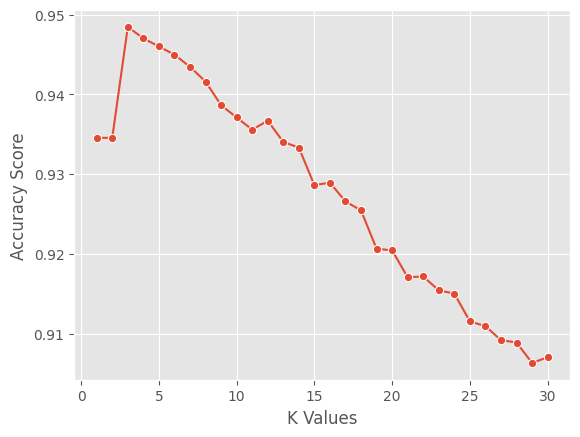

In [ ]:
sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")

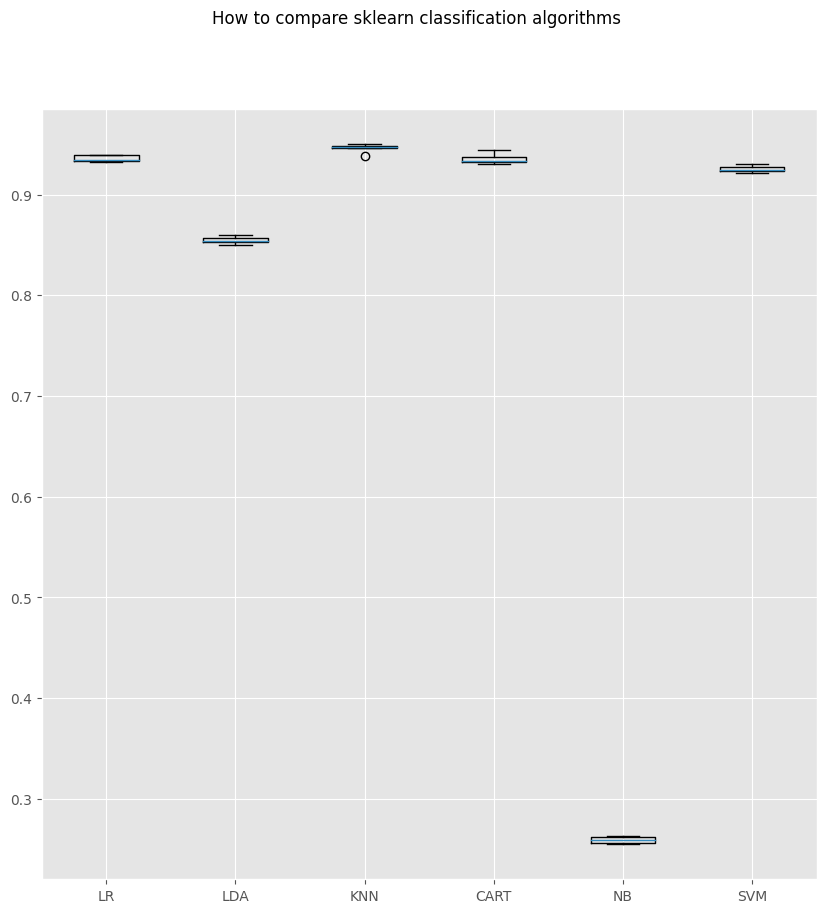

In [ ]:
fig = plt.figure(figsize=(10,10))
fig.suptitle('How to compare sklearn classification algorithms')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

#### 2.6.2. - Testing

In [ ]:
predictions_knn = clf_knn.predict(X_test_class)
predictions_knn

array(['Shoot', 'Shoot', 'Shoot', ..., 'Shoot', 'Shoot', 'Jump'],
      dtype=object)

In [ ]:
from sklearn.metrics import classification_report

classification_report(y_test_class, predictions_knn)

'              precision    recall  f1-score   support\n\n        Jump       0.95      0.93      0.94       611\n        Left       0.92      0.74      0.82        46\n     Protect       0.91      0.90      0.91       187\n       Punch       0.88      0.94      0.91       536\n       Right       0.79      0.71      0.75        42\n       Shoot       0.97      0.96      0.97      1838\n\n    accuracy                           0.94      3260\n   macro avg       0.90      0.87      0.88      3260\nweighted avg       0.94      0.94      0.94      3260\n'

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test_class, predictions_knn)

array([[ 571,    0,    7,    5,    0,   28],
       [   1,   34,    0,    6,    0,    5],
       [   1,    0,  169,   11,    0,    6],
       [   9,    2,    3,  505,    2,   15],
       [   0,    0,    0,    9,   30,    3],
       [  20,    1,    7,   35,    6, 1769]])

In [ ]:
predictions_knn = bestClassifierKNN.predict(X_test_class)
predictions_knn

array(['Shoot', 'Shoot', 'Shoot', ..., 'Shoot', 'Shoot', 'Jump'],
      dtype=object)

In [ ]:
from sklearn.metrics import classification_report

classification_report(y_test_class, predictions_knn)

'              precision    recall  f1-score   support\n\n        Jump       0.95      0.93      0.94       665\n        Left       0.92      0.72      0.81        61\n     Protect       0.91      0.95      0.93       183\n       Punch       0.90      0.95      0.92       464\n       Right       0.83      0.78      0.81        32\n       Shoot       0.97      0.97      0.97      1855\n\n    accuracy                           0.95      3260\n   macro avg       0.91      0.88      0.90      3260\nweighted avg       0.95      0.95      0.95      3260\n'

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test_class, predictions_knn)

array([[ 620,    0,    7,    8,    0,   30],
       [   1,   44,    0,   10,    0,    6],
       [   0,    0,  173,    5,    0,    5],
       [   6,    0,    2,  439,    2,   15],
       [   0,    0,    0,    5,   25,    2],
       [  24,    4,    8,   19,    3, 1797]])

### 2.7. - RandomForestClassifier

RandomForestClassifier: model que es basa en una classificació de bosc
aleatori (Random Forest).

En aquest model, he utilitzat únicament cross_val_score perquè era millor que GridSearchCV.

#### 2.7.1. - Classifier

Aquest model mostra que té bons resultats com els millors models (aproximadament un 95 % de predicció).

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf_random = RandomForestClassifier(max_depth=10, random_state=0)

In [ ]:
from sklearn.model_selection import cross_val_score

cv_results_random = cross_val_score(clf_random, X_scaled_class, y_train_class, cv=10)
print("Resultats: ", cv_results_random)
print("Mitjana: ", cv_results_random.mean())
print("Desviació estandard: ", cv_results_random.std())

Resultats:  [0.95296524 0.94580777 0.94478528 0.9406953  0.94478528 0.9591002
 0.94887526 0.94370522 0.94882293 0.95905834]
Mitjana:  0.9488600804181241
Desviació estandard:  0.006012316684517827


In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import precision_score
scoring_list = {'precision_multiclass': make_scorer(precision_score, average='weighted')}
cv_results_random = cross_validate(clf_random, X_scaled_class, y_train_class, cv=10, scoring=scoring_list)

In [ ]:
cv_results_random

{'fit_time': array([1.80005336, 1.72092295, 1.577425  , 1.04824591, 1.07178569,
        1.04466987, 1.52303648, 1.54100251, 1.0535686 , 1.0506165 ]),
 'score_time': array([0.04292703, 0.05289221, 0.02576423, 0.02431655, 0.02539754,
        0.0421195 , 0.04383039, 0.02575421, 0.02514744, 0.02493691]),
 'test_precision_multiclass': array([0.95314016, 0.94553015, 0.94563479, 0.93981464, 0.94488164,
        0.95953201, 0.94892628, 0.94361361, 0.94913146, 0.95916486])}

Entrenament

In [ ]:
clf_random.fit(X_scaled_class, y_train_class)

RandomForestClassifier(max_depth=10, random_state=0)

#### 2.7.2. - Testing

In [ ]:
predictions_testing_random = clf_random.predict(X_test_class)
predictions_testing_random

array(['Shoot', 'Shoot', 'Shoot', ..., 'Shoot', 'Shoot', 'Jump'],
      dtype=object)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

classification_report(y_test_class,predictions_testing_random)

'              precision    recall  f1-score   support\n\n        Jump       0.97      0.92      0.94       611\n        Left       0.91      0.65      0.76        46\n     Protect       0.92      0.82      0.86       187\n       Punch       0.91      0.95      0.93       536\n       Right       0.78      0.69      0.73        42\n       Shoot       0.96      0.98      0.97      1838\n\n    accuracy                           0.95      3260\n   macro avg       0.91      0.83      0.87      3260\nweighted avg       0.95      0.95      0.95      3260\n'

In [ ]:
confusion_matrix(y_test_class,predictions_testing_random)

array([[ 560,    0,    7,    7,    0,   37],
       [   1,   30,    0,    8,    0,    7],
       [   1,    0,  153,   11,    0,   22],
       [   7,    2,    3,  509,    2,   13],
       [   0,    0,    0,   11,   29,    2],
       [   9,    1,    4,   14,    6, 1804]])

### 2.8. - GaussianNB

Gaussian Naive Bayes (GaussianNB): model que utilitza un algoritme que
es basa al teorema de Bayes, que suposa que les característiques són independents entre si.

El model GausianNB ha obtingut resultats bastant deficients i tampoc
l'he configurat tant perquè els altres models ofereixen millors resultats.

#### 2.8.1. - Classifier

In [ ]:
from sklearn.naive_bayes import GaussianNB

clf_gaussian = GaussianNB()

In [ ]:
from sklearn.model_selection import cross_val_score

cv_results_gaussian = cross_val_score(clf_gaussian,X_scaled_class, y_train_class, cv=50)
print("Resultats: ", cv_results_gaussian)
print("Mitjana: ", cv_results_gaussian.mean())
print("Desviació estandard: ", cv_results_gaussian.std())

Resultats:  [0.26530612 0.27040816 0.2755102  0.25       0.25510204 0.25510204
 0.26530612 0.26020408 0.25510204 0.26020408 0.23979592 0.27040816
 0.26530612 0.27040816 0.27040816 0.25510204 0.26020408 0.25
 0.26020408 0.26020408 0.26020408 0.2755102  0.26020408 0.24489796
 0.24489796 0.27040816 0.25       0.26666667 0.26666667 0.26666667
 0.24102564 0.26153846 0.26153846 0.25641026 0.25641026 0.24102564
 0.25128205 0.26153846 0.25641026 0.25128205 0.25641026 0.24615385
 0.26153846 0.26666667 0.26666667 0.25128205 0.25641026 0.25641026
 0.27179487 0.25641026]
Mitjana:  0.25897226582940874
Desviació estandard:  0.008849659664522705


## 3 - Comparació de models

Després d'estudiar què ha aportat cadascun dels models, podem comparar-los de tal manera que determinarem quin és el més precís i estable. S'ha utilitzat un diagrama de caixes (boxplot) per a analitzar possibles biaixos i/o dades atípiques. Un diagrama de caixes és un gràfic que analitza valors atípics utilitzant la mediana de dades comparant-la amb el quartil superior i inferior de la caixa. Si els valors són molt o poc simètrics ve determinat per la posició de la mediana (si es troba enmig o a prop d'algun dels quartils). Si és poc
simètrica, segurament és perquè conté biaix a l'entrenament de les dades.

He utilitzat el mètode comparador de models per a facilitar l'anàlisi
entre tots dos i elegir el que millor encaixa amb les dades. Així com tenim cadascun dels models que s'havien mostrat prèviament, exceptuant el de Gaussian perquè tenia una diferència tan notòria als resultats.
A més, s'ha afegit un nou model per obtenir una diferència entre els altres: SVC.

In [ ]:
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt

plt.style.use('ggplot')

In [ ]:
# https://www.projectpro.io/recipes/compare-sklearn-classification-algorithms-in-python
models = []
models.append(('GBC', classifierGradient))
models.append(('DTC', classifier_tree))
models.append(('KNN', clf_knn))
models.append(('RFC', clf_random))
models.append(('SVM', SVC()))

In [ ]:
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    cv_results = model_selection.cross_val_score(model, X_scaled_class, y_train_class, cv=10, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

GBC: 0.947940 (0.006908)
DTC: 0.937098 (0.005961)
KNN: 0.947224 (0.004430)
RFC: 0.948860 (0.006012)
SVM: 0.926256 (0.005933)


Podem veure com es guarden tots els models per després fer una avaluació creuada per a cadascun amb les mateixes propietats, per tal de ser imparcials amb els resultats en la comparació. Finalment es mostren la precisió i la desviació estàndard de cada model.

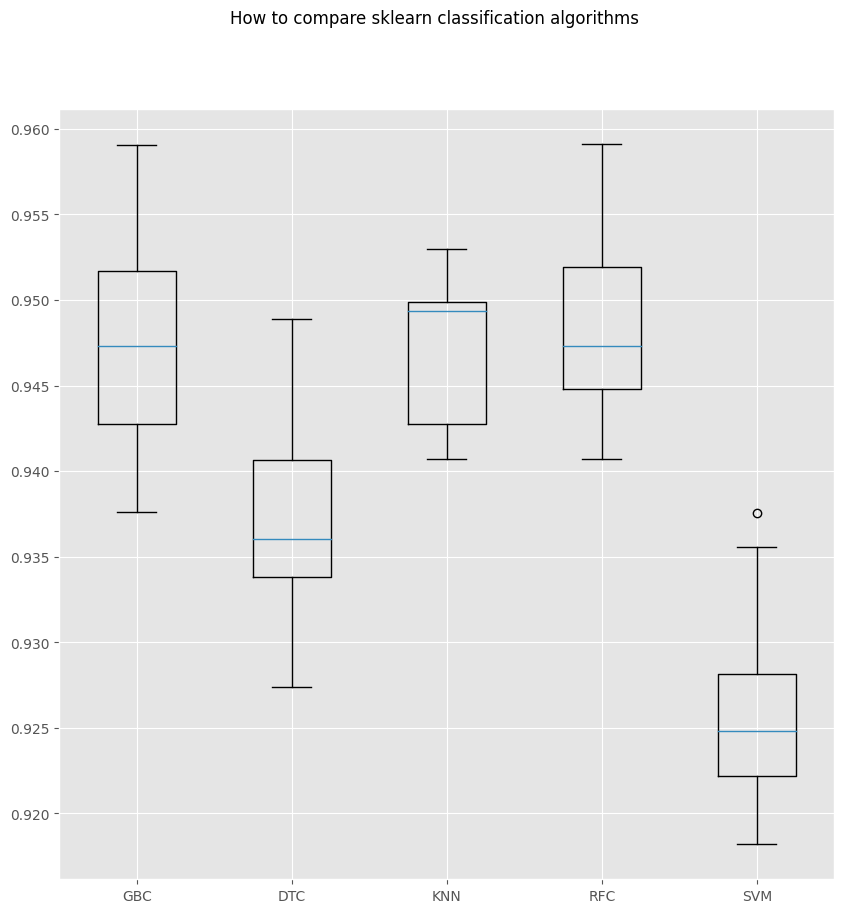

In [ ]:
fig = plt.figure(figsize=(10,10))
fig.suptitle('How to compare sklearn classification algorithms')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Finalment, es pot veure cadascuna de les caixes que representen a cadascun dels models. Si mirem amb deteniment, podem apreciar que
el més extravagant de tots, sense comptar el Gaussian, és l'SVM perquè, a més de contenir dades atípiques per sobre dels valors màxims, és el que té pitjor mediana. Si recordem, els quatre models inicials eren els que tenien els valors més similars: GradientBoostingClassifier, DecisionTreeClassifier, KNeighborsClassifier i RandomForestClassifier respectivament. No obstant això, podem comprovar que el model de DecisionTreeClassifier és una mica pitjor que la resta i, el del KNN, tot i què competeix amb els dos millors té pitjor mediana en tendir al quartil superior. En altres paraules, conté biaix.

Finalment, només queden amb els models de GradientBoostingClassifier, i
RandomForestClassifier com que són molts semblants però tenen unes diferències importants. El segon model és el que té millor precisió tant a les màximes com a les mínimes en comparació amb el primer, però el primer és el més simètric. És aquesta la raó amb què em vaig decantar cap al model GradientBoostingClassifier sobre la resta. Per resumir, GradientBoostingClassifier és el model que prediu les dades del dataset de validació i el transforma al dataset resultant.